In [2]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
X_train_full.shape


(60000, 28, 28)

In [4]:
X_train_full.dtype


dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.


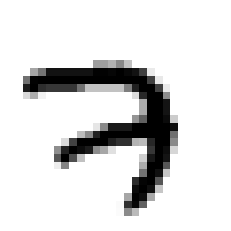

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


In [7]:
y_train


array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

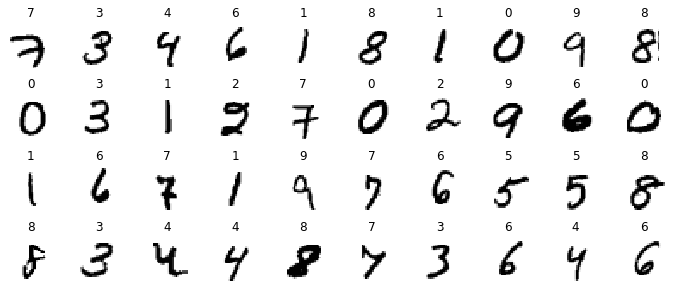

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [9]:
K = keras.backend


class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate,
                    self.model.optimizer.learning_rate * self.factor)


In [11]:
import tensorflow as tf
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


2022-05-07 20:37:09.697527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-07 20:37:09.697650: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-07 20:37:09.697709: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-GC2VT9N): /proc/driver/nvidia/version does not exist
2022-05-07 20:37:09.698634: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)


In [14]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])


1719/1719 [==============================] - 6s 4ms/step - loss: nan - accuracy: 0.5946 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

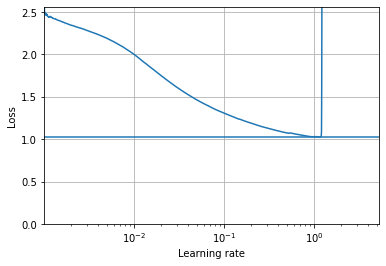

In [15]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")


In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])


In [19]:
run_index = 1  # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs",
                          "run_{:03d}".format(run_index))
run_logdir


'./my_mnist_logs/run_001'

In [20]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])


Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2362 - accuracy: 0.9266 - val_loss: 0.0978 - val_accuracy: 0.9704
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0949 - accuracy: 0.9703 - val_loss: 0.0885 - val_accuracy: 0.9744
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9784 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 4/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0468 - accuracy: 0.9847 - val_loss: 0.0742 - val_accuracy: 0.9794
Epoch 5/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.0674 - val_accuracy: 0.9820
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0779 - val_accuracy: 0.9802
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0721 - val_ac

In [21]:
model = keras.models.load_model("my_mnist_model.h5")  # rollback to best model
model.evaluate(X_test, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0746 - accuracy: 0.9791


[0.07462937384843826, 0.9790999889373779]

In [22]:
%tensorboard - -logdir = ./my_mnist_logs - -port = 6006


UsageError: Line magic function `%tensorboard` not found.
